# Practica 11

## Operador IN

### Crea un subquery para generar una vista con:

**1 Los vendedores que no vendieron en 2018**

In [ ]:
CREATE VIEW Vendedores_Sin_Ventas_2018 AS
SELECT v.ID_Vendedor, v.Nombre, v.Apellido
FROM vendedor AS v
WHERE v.ID_Vendedor NOT IN (
    SELECT DISTINCT ve.ID_Vendedor
    FROM ventas AS ve
    WHERE YEAR(ve.`Fecha venta`) = 2018
);


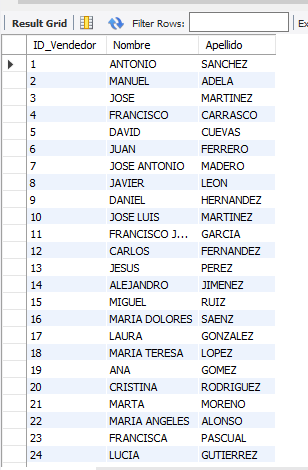

**2 Productos que no se vendieron en marzo del 2017**

In [2]:
USE base;
SELECT p.ID_Producto, p.Producto
FROM producto AS p
WHERE p.ID_Producto NOT IN (
    SELECT DISTINCT ve.ID_producto
    FROM ventas AS ve
    WHERE YEAR(ve.`Fecha venta`) = 2017 AND MONTH(ve.`Fecha venta`) = 3
);


Commands completed successfully

(7 row(s) affected)

Total execution time: 00:00:01.016

ID_Producto,Producto
1,Terreno
2,Oficina
3,Local
4,Nave
5,Isla
6,Consultorio
7,Remates


**3. Clientes que compraron propiedas de remates Bancarios en el primer cuarto de 2016**

In [3]:
SELECT DISTINCT c.ID_Cliente, c.Nombre, v.`Fecha venta`
FROM clientes AS c
JOIN ventas AS v ON c.ID_Cliente = v.ID_Cliente
WHERE STR_TO_DATE(v.`Fecha venta`, '%d-%b-%y') BETWEEN '2016-01-01' AND '2016-03-31'
AND v.ID_producto IN (SELECT ID_Producto FROM producto WHERE Producto ='Remates');

(9 row(s) affected)

Total execution time: 00:00:01.020

ID_Cliente,Nombre,Fecha venta
3,Tierra y Paz,1-Feb-16
7,The LandLord,29-Feb-16
1,Mart B & C,13-Mar-16
4,Agora e Tudo MM,13-Mar-16
10,Bienestar Land,20-Mar-16
4,Agora e Tudo MM,22-Mar-16
3,Tierra y Paz,27-Mar-16
3,Tierra y Paz,29-Mar-16
9,JKP Asesores,4-Feb-16


### <span style="font-size: 16.38px;">Uso de ALL &amp; ANY</span>

### <span style="font-size: 16.38px;">Genera una vista para entregar el informe que contenga:</span>

**4. Todas las ventas superiores a la venta más cara de una oficina**

In [4]:

SELECT v.*
FROM ventas AS v
WHERE v.Venta > ALL (
    SELECT v2.Venta
    FROM ventas AS v2
    JOIN producto AS p2 ON v2.ID_Producto = p2.ID_Producto
    WHERE p2.Producto = 'Oficina'
);

(7 row(s) affected)

Total execution time: 00:00:01.016

ID_Venta,Fecha venta,ID_producto,ID_Zona,Venta,ID_Vendedor,ID_Cliente
13,1-Jan-16,1,4,2937300,28,5
873,11-Jun-16,5,1,2923155,49,3
2654,8-Oct-18,6,2,2909412,45,10
2697,28-Aug-18,3,4,2977318,10,8
3126,2-Jul-19,3,3,2902284,27,6
3268,29-Mar-19,5,4,2908500,43,10
3289,4-Jun-19,1,1,2914416,13,8


**5. Cualquier venta mayor al de una oficina**

In [5]:
SELECT v.*
FROM ventas AS v
WHERE v.Venta > ANY (
    SELECT v2.Venta
    FROM ventas AS v2
    JOIN producto AS p2 ON v2.ID_Producto = p2.ID_Producto
    WHERE p2.Producto = 'Oficina')
    LIMIT 100;

(100 row(s) affected)

Total execution time: 00:00:01.011

ID_Venta,Fecha venta,ID_producto,ID_Zona,Venta,ID_Vendedor,ID_Cliente
1,29-Dec-15,1,1,2133903,42,3
2,29-Dec-15,2,2,1945424,5,1
3,29-Dec-15,3,2,712416,20,10
4,30-Dec-15,1,2,1815450,30,9
5,30-Dec-15,4,3,1138024,41,8
6,31-Dec-15,5,2,953156,18,3
7,31-Dec-15,1,3,406686,36,9
8,31-Dec-15,3,2,2158475,21,6
9,1-Jan-16,6,1,1024380,13,10
10,1-Jan-16,1,1,2042768,43,7


## EXISTS

## Buscaremos a todos los vendedores que no vendieron usando EXISTS y el uso de un query correlacionado:

**6. Todos los vendedores que no han vendido nada**

In [7]:
SELECT v.ID_Vendedor, v.Nombre, v.Apellido
FROM vendedor AS v
WHERE NOT EXISTS (
    SELECT 1
    FROM ventas AS ve
    WHERE ve.ID_Vendedor = v.ID_Vendedor
);


(1 row(s) affected)

Total execution time: 00:00:01.007

ID_Vendedor,Nombre,Apellido
48,ROBERTO,MARTIN


## Subqueries en SELECT

## Crea un subquery en SELECT para:

**7. Obtener el % que representa cada venta del total por cliente**

In [8]:
SELECT v.ID_Venta,
       v.ID_Cliente,
       v.Venta,
       (v.Venta / c.Total_Ventas) * 100 AS Porcentaje_del_Total
FROM ventas AS v
JOIN (
    SELECT ID_Cliente, SUM(Venta) AS Total_Ventas
    FROM ventas
    GROUP BY ID_Cliente
) AS c ON v.ID_Cliente = c.ID_Cliente
LIMIT 100;

(100 row(s) affected)

Total execution time: 00:00:01.007

ID_Venta,ID_Cliente,Venta,Porcentaje_del_Total
1,3,2133903,0.5378
2,1,1945424,0.5003
3,10,712416,0.1787
4,9,1815450,0.4470
5,8,1138024,0.2961
6,3,953156,0.2402
7,9,406686,0.1001
8,6,2158475,0.5232
9,10,1024380,0.2569
10,7,2042768,0.5158
